In [4]:
import pandas as pd
df = pd.read_json('/bigwork/nhmlhuer/git/backup/gs_rl/final_benchmark_other_agent.json')
df


,dataset_name,SSIM,PSNR,num_points,point_cloud_size_mb,base_model,rl_lr
0,train,0.803072,22.018988,594010,140.491496,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
1,truck,0.875516,25.633478,1459304,345.143246,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
2,train,0.801674,22.100937,591399,139.873965,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
3,playroom,0.909928,30.387678,1010023,238.883244,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
4,train,0.806137,22.193739,604978,143.085551,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
5,truck,0.875842,25.648760,1468110,347.225964,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
6,truck,0.875635,25.594131,1459148,345.106350,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
7,train,0.800265,21.997852,586016,138.600825,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
8,truck,0.875399,25.580286,1483935,350.968754,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001
9,playroom,0.909613,30.113152,1018668,240.927883,/bigwork/nhmlhuer/git/master_evaluation/imitat...,0.001


In [5]:
# Map scenes to datasets
dataset_mapping = {
    "truck": "tank_temples",
    "train": "tank_temples",
    "playroom": "deep_blending",
    "drjohnson": "deep_blending"
}

# Add a new column for dataset
df['dataset'] = df['dataset_name'].map(dataset_mapping)

# Calculate the average PSNR, SSIM, and num_points for each dataset
averages = df.groupby('dataset')[['PSNR', 'SSIM', 'num_points', 'point_cloud_size_mb']].mean().reset_index()

print(averages)

         dataset       PSNR      SSIM    num_points  point_cloud_size_mb
0  deep_blending  29.457165  0.903710  1.339079e+06           316.708762
1   tank_temples  23.846021  0.839192  1.030862e+06           243.812019


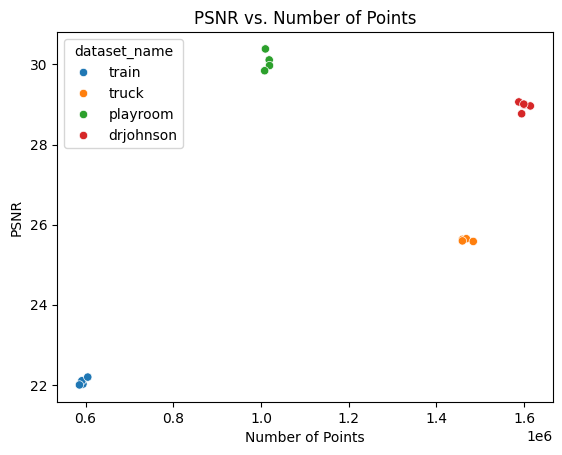

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot PSNR vs. Number of Points
sns.scatterplot(data=df, x='num_points', y='PSNR', hue='dataset_name')
plt.title('PSNR vs. Number of Points')
plt.xlabel('Number of Points')
plt.ylabel('PSNR')
plt.show()
